In [57]:
import pandas as pd
import requests
import random
from time import sleep
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import numpy as np
import nltk
import os
from sklearn import datasets
import datetime
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
df = pd.read_pickle("Data/Fitbit_and_MFP_Cleaned.pkl")

df.reset_index(inplace=True)

df.head(50)

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,...,Sugar_Lunch,Protein_(g)_Lunch,Calories_Dinner,Fat_(g)_Dinner,Carbohydrates_(g)_Dinner,Sugar_Dinner,Protein_(g)_Dinner,Weight,Net_Calories,Day_of_week
0,2016-12-16,7949.359551,6.100120,1856.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,8.665049,35.784466,612.128571,26.658929,52.296429,9.191071,39.676786,NaN,NaN,Friday
1,2016-12-17,5514.820225,4.235007,1855.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,10.906000,38.568000,686.482353,28.591176,59.961765,9.650000,42.591176,NaN,NaN,Saturday
2,2016-12-18,4782.921348,3.679812,1855.0,5.146067,15.494382,702.179775,1440.0,85.123596,12.157303,...,14.485714,37.671429,864.811628,41.697674,71.923256,10.444186,45.627907,NaN,-1110.2,Sunday
3,2016-12-19,6743.966292,5.175902,1855.0,4.640449,13.977528,869.786517,1440.0,127.393258,9.348315,...,9.600000,24.800000,175.000000,27.105797,30.000000,15.000000,5.000000,186.800000,-660.1,Monday
4,2016-12-20,7318.181818,5.671428,1854.0,5.215909,15.704545,911.261364,1440.0,148.397727,8.636364,...,16.000000,24.000000,519.700000,15.600000,44.000000,14.100000,47.700000,186.483333,-154.3,Tuesday
5,2016-12-21,7112.386364,5.472372,1854.0,3.909091,11.761364,899.102273,1440.0,155.465909,7.477273,...,9.325600,38.228800,653.856044,26.008791,56.232967,8.345055,42.856044,186.166667,-978.3,Wednesday
6,2016-12-22,7365.511364,5.715491,1854.0,4.420455,13.284091,857.477273,1440.0,145.545455,6.340909,...,2.000000,7.000000,629.000000,25.000000,72.000000,6.942857,31.000000,185.850000,-142.5,Thursday
7,2016-12-23,7949.359551,6.100120,1853.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,5.000000,38.000000,612.128571,26.658929,52.296429,9.191071,39.676786,185.533333,-1036.9,Friday
8,2016-12-24,5514.820225,4.235007,1853.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,6.000000,50.000000,686.482353,28.591176,59.961765,9.650000,42.591176,185.216667,-903.0,Saturday
9,2016-12-25,1178.000000,0.882320,2074.0,3.000000,9.000000,268.000000,1368.0,72.000000,12.157303,...,14.485714,37.671429,864.811628,41.697674,71.923256,10.444186,45.627907,184.900000,NaN,Sunday


In [59]:
## INTERPOLATING WEIGHTS THAT ARE MISSING

df.Weight = df.Weight.interpolate(method='linear')
df['Day_of_week'] = df['Date'].dt.day_name()

df.head(50)

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,...,Sugar_Lunch,Protein_(g)_Lunch,Calories_Dinner,Fat_(g)_Dinner,Carbohydrates_(g)_Dinner,Sugar_Dinner,Protein_(g)_Dinner,Weight,Net_Calories,Day_of_week
0,2016-12-16,7949.359551,6.100120,1856.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,8.665049,35.784466,612.128571,26.658929,52.296429,9.191071,39.676786,NaN,NaN,Friday
1,2016-12-17,5514.820225,4.235007,1855.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,10.906000,38.568000,686.482353,28.591176,59.961765,9.650000,42.591176,NaN,NaN,Saturday
2,2016-12-18,4782.921348,3.679812,1855.0,5.146067,15.494382,702.179775,1440.0,85.123596,12.157303,...,14.485714,37.671429,864.811628,41.697674,71.923256,10.444186,45.627907,NaN,-1110.2,Sunday
3,2016-12-19,6743.966292,5.175902,1855.0,4.640449,13.977528,869.786517,1440.0,127.393258,9.348315,...,9.600000,24.800000,175.000000,27.105797,30.000000,15.000000,5.000000,186.800000,-660.1,Monday
4,2016-12-20,7318.181818,5.671428,1854.0,5.215909,15.704545,911.261364,1440.0,148.397727,8.636364,...,16.000000,24.000000,519.700000,15.600000,44.000000,14.100000,47.700000,186.483333,-154.3,Tuesday
5,2016-12-21,7112.386364,5.472372,1854.0,3.909091,11.761364,899.102273,1440.0,155.465909,7.477273,...,9.325600,38.228800,653.856044,26.008791,56.232967,8.345055,42.856044,186.166667,-978.3,Wednesday
6,2016-12-22,7365.511364,5.715491,1854.0,4.420455,13.284091,857.477273,1440.0,145.545455,6.340909,...,2.000000,7.000000,629.000000,25.000000,72.000000,6.942857,31.000000,185.850000,-142.5,Thursday
7,2016-12-23,7949.359551,6.100120,1853.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,5.000000,38.000000,612.128571,26.658929,52.296429,9.191071,39.676786,185.533333,-1036.9,Friday
8,2016-12-24,5514.820225,4.235007,1853.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,6.000000,50.000000,686.482353,28.591176,59.961765,9.650000,42.591176,185.216667,-903.0,Saturday
9,2016-12-25,1178.000000,0.882320,2074.0,3.000000,9.000000,268.000000,1368.0,72.000000,12.157303,...,14.485714,37.671429,864.811628,41.697674,71.923256,10.444186,45.627907,184.900000,NaN,Sunday


Text(0.5,1,'Time Series of Weight')

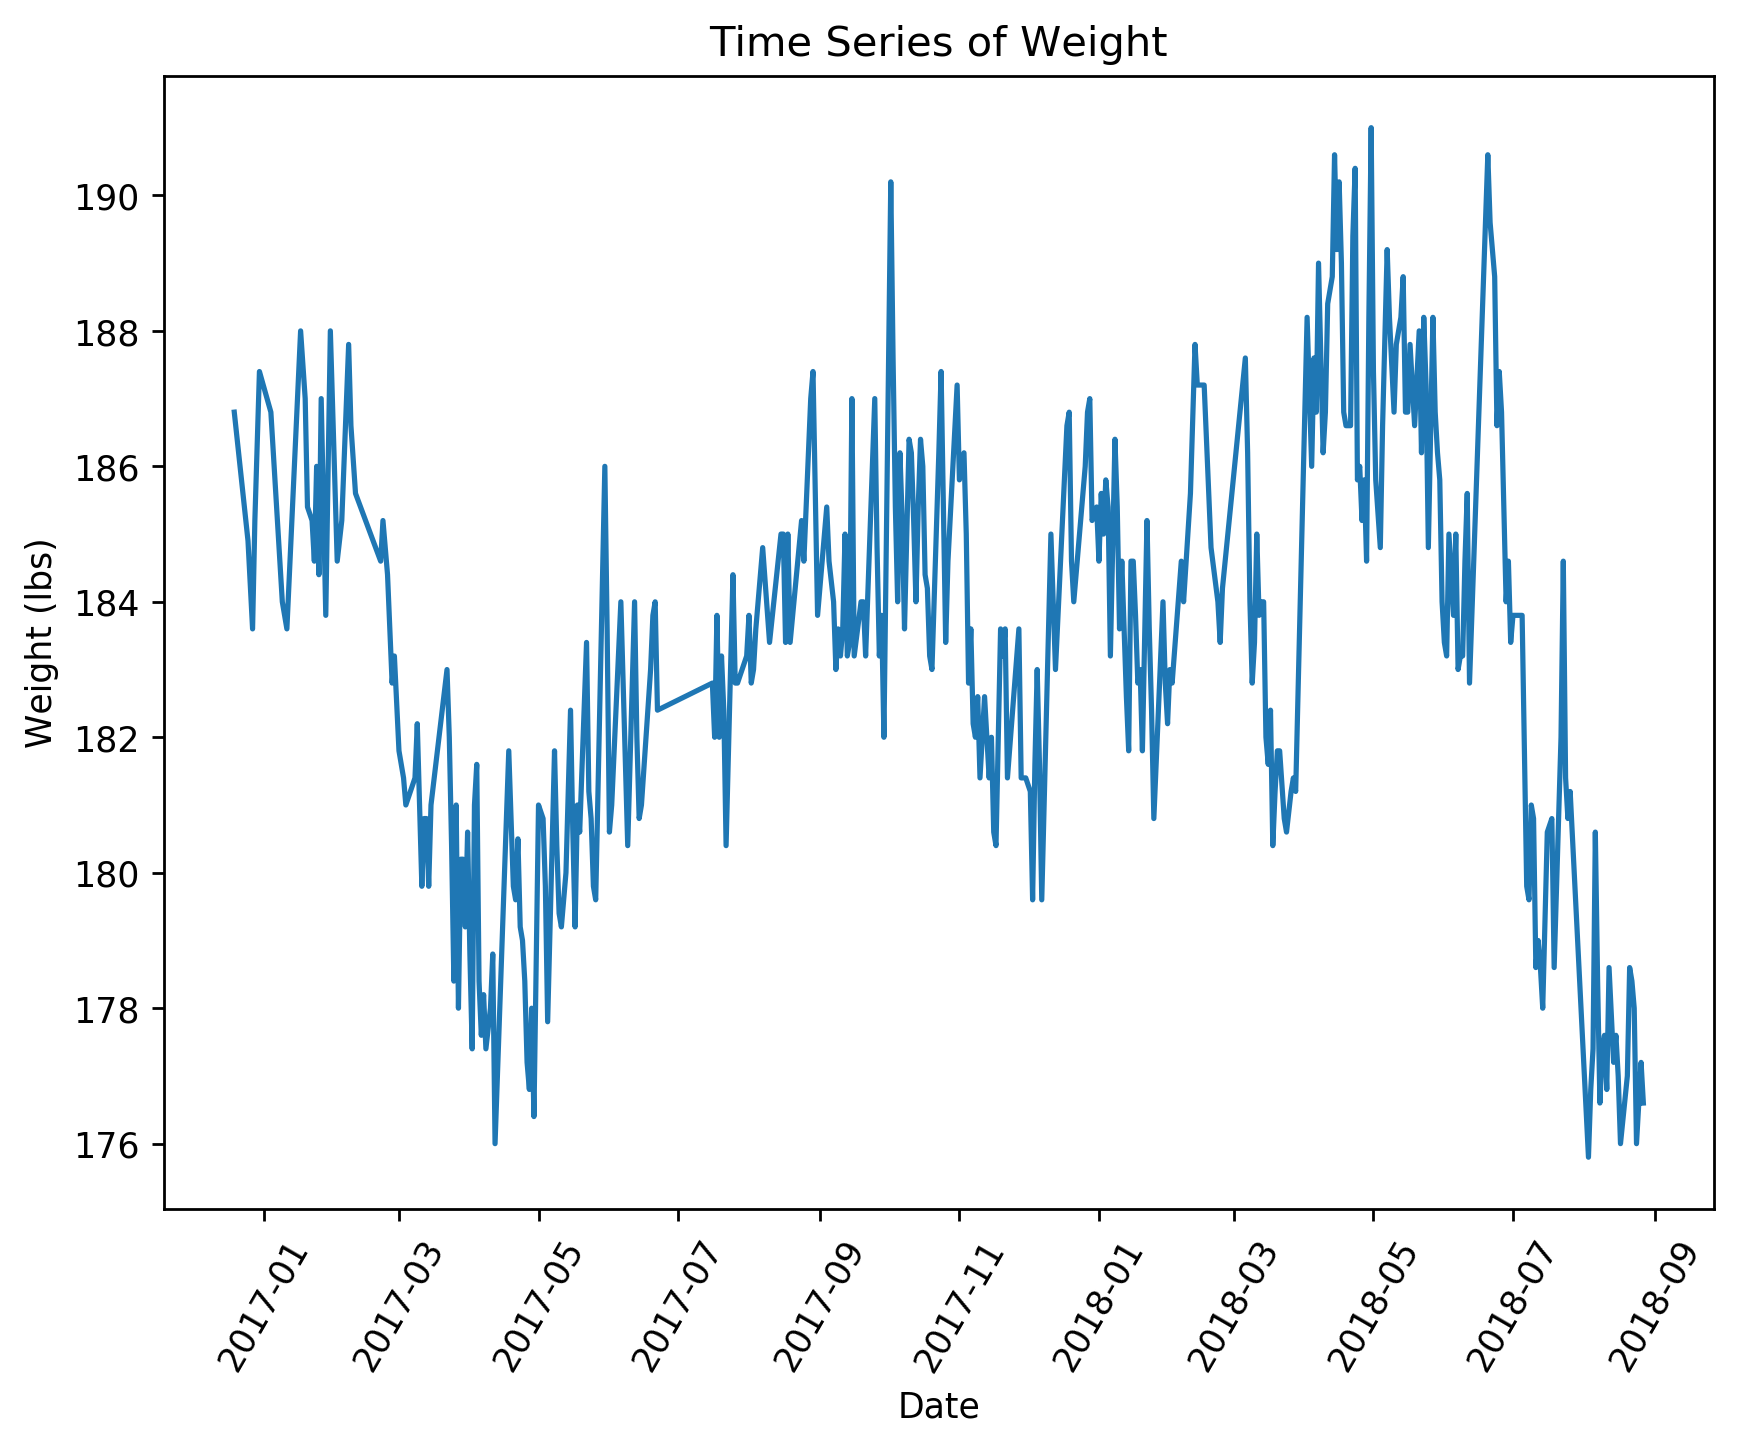

In [60]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=250, facecolor='w', edgecolor='k');

plt.plot(df.Date, df.Weight);


plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('Weight (lbs)')
plt.title('Time Series of Weight')

Text(0.5,1,'Time Series of Calorie Intake')

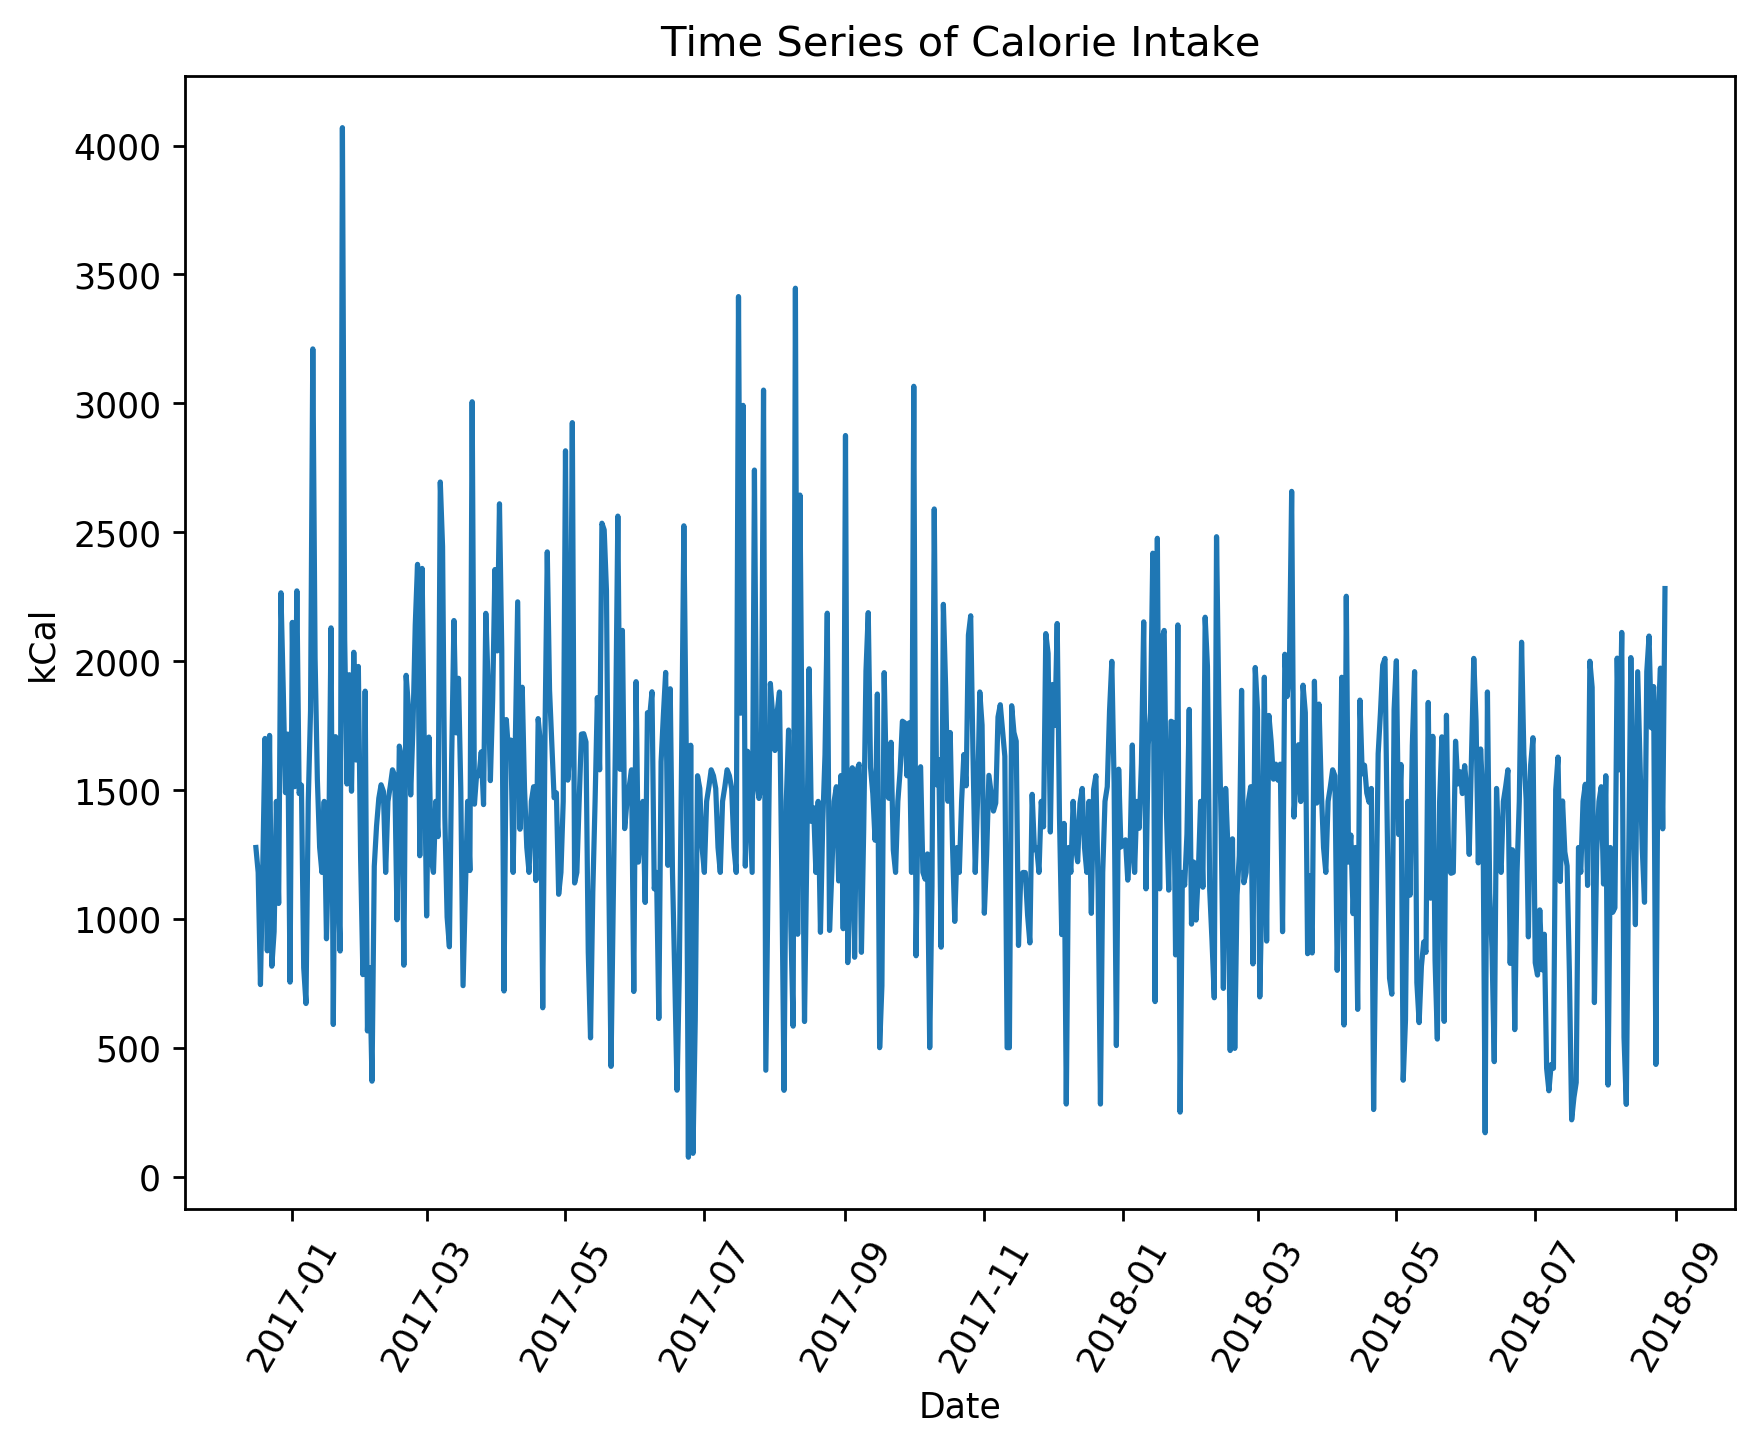

In [61]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=250, facecolor='w', edgecolor='k');

plt.plot(df.Date, df.Calories);


plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('kCal')
plt.title('Time Series of Calorie Intake')

In [62]:
df["Calories_MA30"] = df.Calories.rolling(window=30, center=True).mean()
df["Weight_MA30"] = df.Weight.rolling(window=30, center=True).mean()
df.head(20)

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,...,Calories_Dinner,Fat_(g)_Dinner,Carbohydrates_(g)_Dinner,Sugar_Dinner,Protein_(g)_Dinner,Weight,Net_Calories,Day_of_week,Calories_MA30,Weight_MA30
0,2016-12-16,7949.359551,6.100120,1856.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,612.128571,26.658929,52.296429,9.191071,39.676786,NaN,NaN,Friday,NaN,NaN
1,2016-12-17,5514.820225,4.235007,1855.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,686.482353,28.591176,59.961765,9.650000,42.591176,NaN,NaN,Saturday,NaN,NaN
2,2016-12-18,4782.921348,3.679812,1855.0,5.146067,15.494382,702.179775,1440.0,85.123596,12.157303,...,864.811628,41.697674,71.923256,10.444186,45.627907,NaN,-1110.2,Sunday,NaN,NaN
3,2016-12-19,6743.966292,5.175902,1855.0,4.640449,13.977528,869.786517,1440.0,127.393258,9.348315,...,175.000000,27.105797,30.000000,15.000000,5.000000,186.800000,-660.1,Monday,NaN,NaN
4,2016-12-20,7318.181818,5.671428,1854.0,5.215909,15.704545,911.261364,1440.0,148.397727,8.636364,...,519.700000,15.600000,44.000000,14.100000,47.700000,186.483333,-154.3,Tuesday,NaN,NaN
5,2016-12-21,7112.386364,5.472372,1854.0,3.909091,11.761364,899.102273,1440.0,155.465909,7.477273,...,653.856044,26.008791,56.232967,8.345055,42.856044,186.166667,-978.3,Wednesday,NaN,NaN
6,2016-12-22,7365.511364,5.715491,1854.0,4.420455,13.284091,857.477273,1440.0,145.545455,6.340909,...,629.000000,25.000000,72.000000,6.942857,31.000000,185.850000,-142.5,Thursday,NaN,NaN
7,2016-12-23,7949.359551,6.100120,1853.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,612.128571,26.658929,52.296429,9.191071,39.676786,185.533333,-1036.9,Friday,NaN,NaN
8,2016-12-24,5514.820225,4.235007,1853.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,686.482353,28.591176,59.961765,9.650000,42.591176,185.216667,-903.0,Saturday,NaN,NaN
9,2016-12-25,1178.000000,0.882320,2074.0,3.000000,9.000000,268.000000,1368.0,72.000000,12.157303,...,864.811628,41.697674,71.923256,10.444186,45.627907,184.900000,NaN,Sunday,NaN,NaN


Text(0.5,1,'Time Series of Weight (30 Day RWindow)')

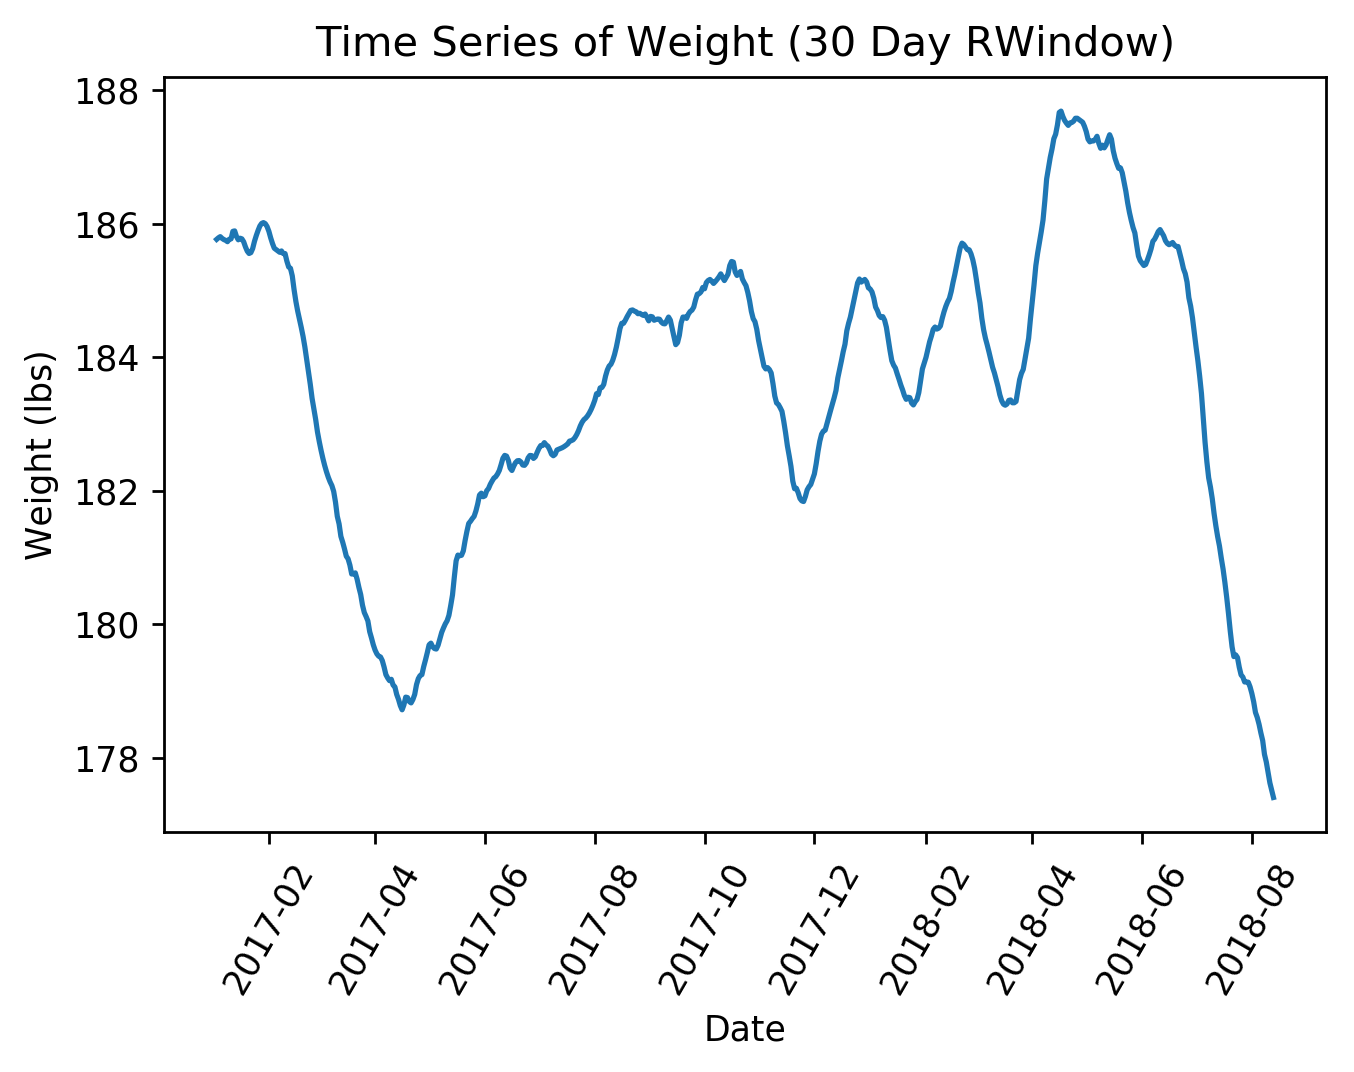

In [63]:
df.set_index('Date', inplace=True)

plt.figure(dpi=250)
plt.plot(df["Weight_MA30"])
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('Weight (lbs)')
plt.title('Time Series of Weight (30 Day RWindow)')

Text(0.5,1,'Time Series of Calories (30 Day RWindow)')

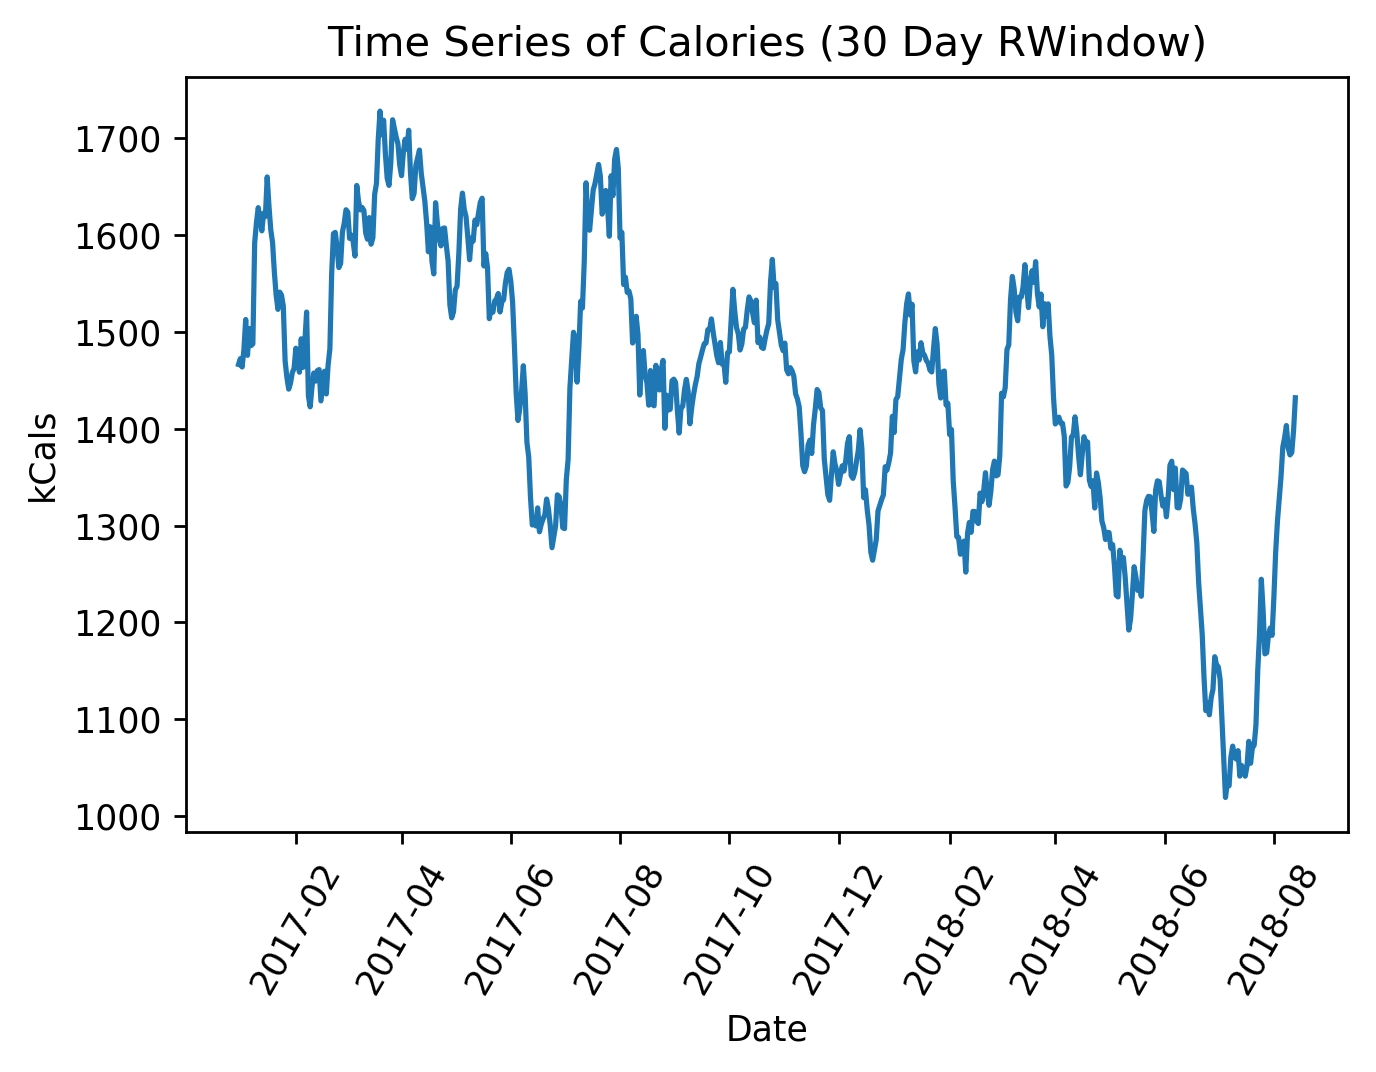

In [64]:
plt.figure(dpi=250)
plt.plot(df["Calories_MA30"])
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('kCals')
plt.title('Time Series of Calories (30 Day RWindow)')

(array([736361., 736420., 736481., 736542., 736603., 736664., 736726.,
        736785., 736846., 736907.]), <a list of 10 Text xticklabel objects>)

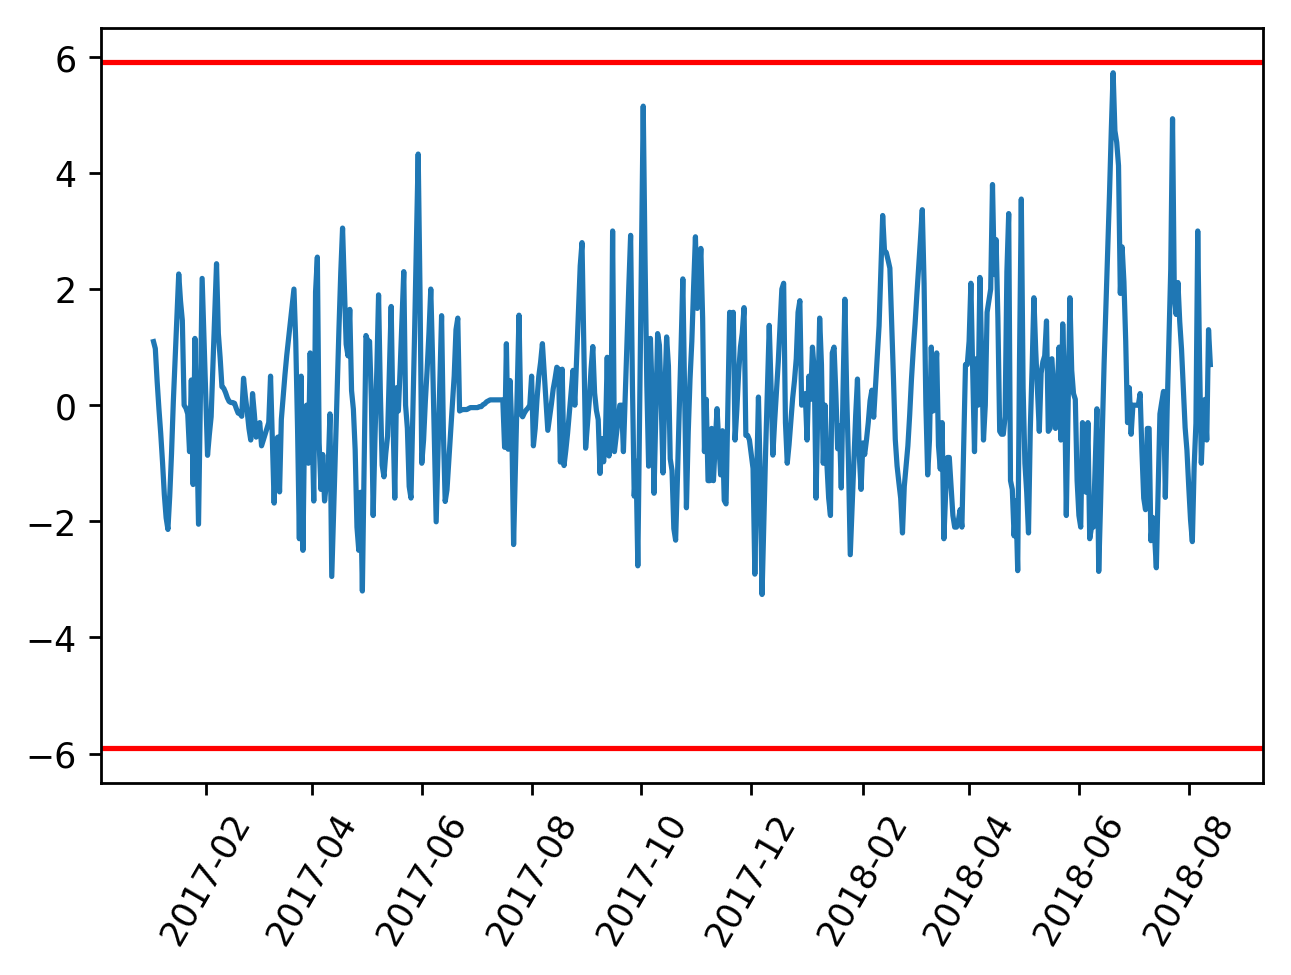

In [65]:
df['Median_Weight'] = df['Weight'].rolling(30, center=True).median()
df['Std_Weight'] = df['Weight'].rolling(12, center=True).std()
std_dev = df['Weight'].std()

df['residual'] = df['Weight'] - df['Median_Weight']

plt.figure(dpi=250)
plt.plot(df['residual'])
plt.gca().axhline(2*std_dev, c='r')
plt.gca().axhline(-2*std_dev, c='r')
plt.xticks(rotation=60)

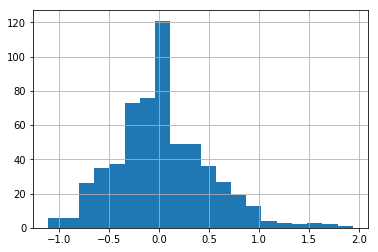

In [66]:
df['z'] = df['residual'] / std_dev
df['z'].hist(bins=20);

In [67]:
print('0 diffs:', df['Weight'].std())
print('1 diffs:', df['Weight'].diff().std())
print('2 diffs:', df['Weight'].diff().diff().std())
print('3 diffs:', df['Weight'].diff().diff().diff().std())

0 diffs: 2.95515957446908
1 diffs: 1.160816534567066
2 diffs: 1.658913357728994
3 diffs: 2.7829457480930295


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor

df['lag1'] = df['Weight'].shift(1)
df.head()

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,...,Weight,Net_Calories,Day_of_week,Calories_MA30,Weight_MA30,Median_Weight,Std_Weight,residual,z,lag1
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-16,7949.359551,6.100120,1856.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,16.202247,...,NaN,NaN,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-17,5514.820225,4.235007,1855.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,23.292135,...,NaN,NaN,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-18,4782.921348,3.679812,1855.0,5.146067,15.494382,702.179775,1440.0,85.123596,12.157303,24.078652,...,NaN,-1110.2,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-19,6743.966292,5.175902,1855.0,4.640449,13.977528,869.786517,1440.0,127.393258,9.348315,23.853933,...,186.800000,-660.1,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-20,7318.181818,5.671428,1854.0,5.215909,15.704545,911.261364,1440.0,148.397727,8.636364,17.397727,...,186.483333,-154.3,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN,186.8


Text(0.5,1,'Time Series of Weight (1 Day RWindow)')

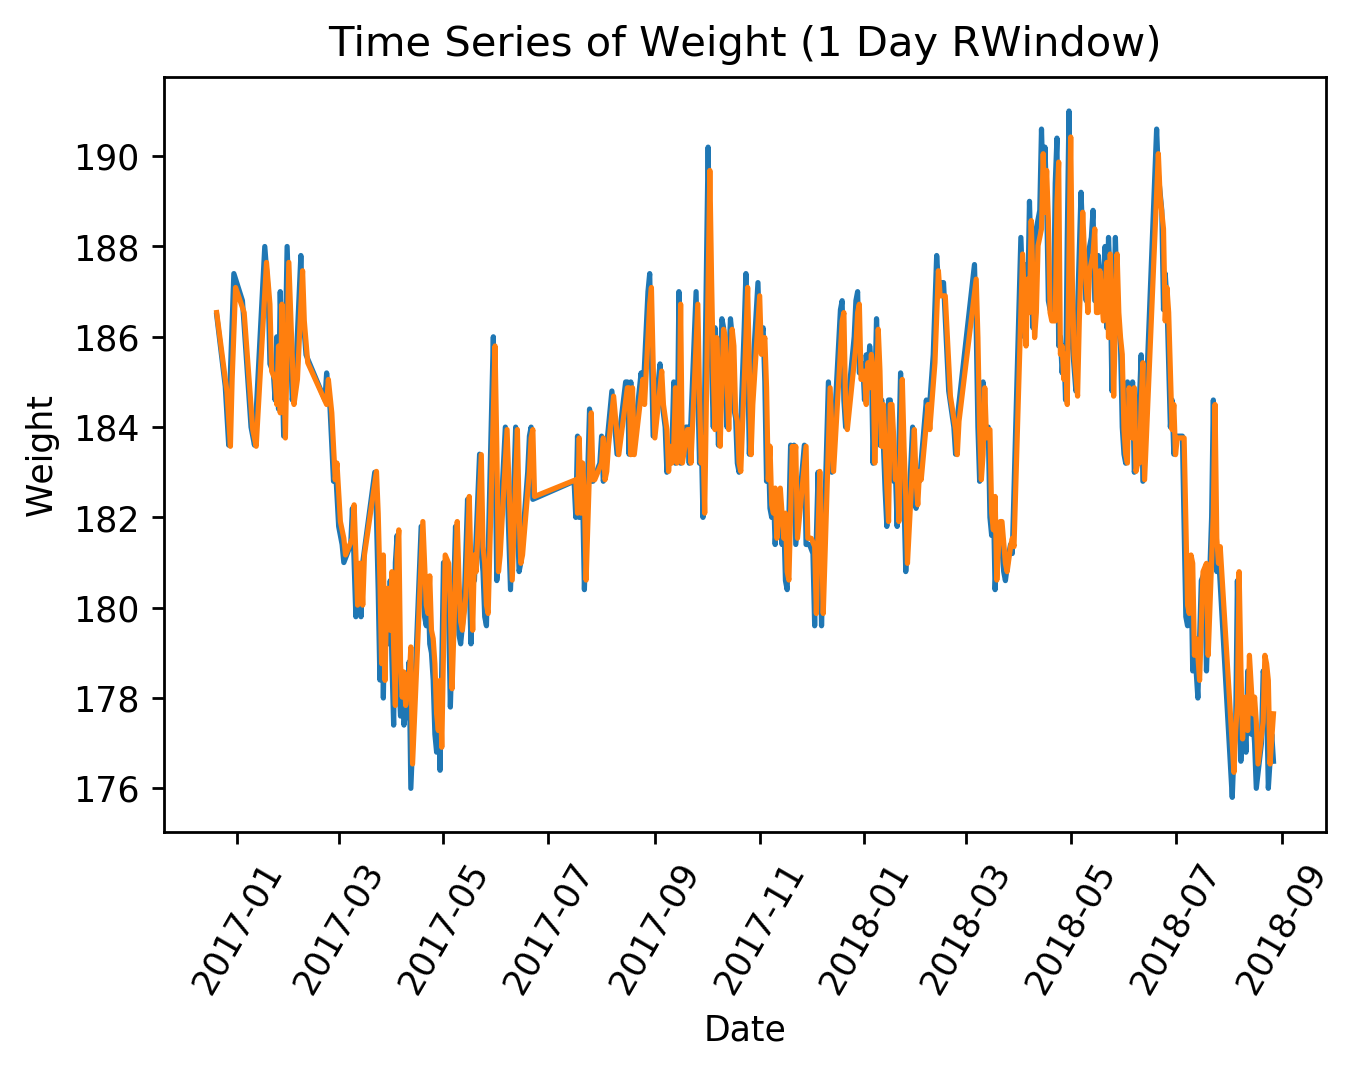

In [69]:
ar1 = LinearRegression()

X = df.iloc[4:, -1].values.reshape(-1,1)
target= df['Weight'].values[4:]
ar1.fit(X, target)

plt.figure(dpi=250)
plt.plot(df.index[4:], target, label='actual')
plt.plot(df.index[4:], ar1.predict(X), label='predicted')
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('Weight')
plt.title('Time Series of Weight (1 Day RWindow)')

In [70]:
ar1.score(X, target)

0.8511176797376809

In [71]:
for i in range(1,2):
    df[f'lag{i}'] = df['Weight'].shift(i)

X = df.iloc[:,:]
X.head()

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,...,Weight,Net_Calories,Day_of_week,Calories_MA30,Weight_MA30,Median_Weight,Std_Weight,residual,z,lag1
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-16,7949.359551,6.100120,1856.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,16.202247,...,NaN,NaN,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-17,5514.820225,4.235007,1855.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,23.292135,...,NaN,NaN,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-18,4782.921348,3.679812,1855.0,5.146067,15.494382,702.179775,1440.0,85.123596,12.157303,24.078652,...,NaN,-1110.2,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-19,6743.966292,5.175902,1855.0,4.640449,13.977528,869.786517,1440.0,127.393258,9.348315,23.853933,...,186.800000,-660.1,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-20,7318.181818,5.671428,1854.0,5.215909,15.704545,911.261364,1440.0,148.397727,8.636364,17.397727,...,186.483333,-154.3,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN,186.8


In [72]:
X = df.loc[:, ['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Cholesterol', 'Sodium (mg)', 'Potassium',
       'Carbohydrates (g)', 'Fiber', 'Vitamin A',
       'Vitamin C', 'Calcium', 'Iron', 'Calories_Breakfast',
       'Fat_(g)_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Fat_(g)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Fat_(g)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner','lag1']]
X = X.dropna()
y = df.loc[X.index, 'Weight']

In [73]:
ar1 = LinearRegression()
ar1.fit(X, y)
ar1_score = ar1.score(X,y)

svc1 = SVR()
svc1.fit(X, y)
svc1_score = svc1.score(X,y)

dt1 = DecisionTreeRegressor()
dt1.fit(X, y)
dt1_score = dt1.score(X,y)

rf1 = RandomForestRegressor()
rf1.fit(X, y)
rf1_score = rf1.score(X,y)

gbt1 = GradientBoostingRegressor()
gbt1.fit(X, y)
gbt1_score = gbt1.score(X,y)

dc1 = DummyRegressor()
dc1.fit(X, y)
dc1_score = dc1.score(X,y)

print('Scores using 1 lag')
print(f'Linear Regression Score: {ar1_score}')
print(f'Support Vector Regressor Score: {svc1_score}')
print(f'Decision Tree Score: {dt1_score}')
print(f'Random Forest Regressor Score: {rf1_score}')
print(f'Gradient Boosted Trees Regressor Score: {gbt1_score}')
print(f'Dummy Classifier Score: {dc1_score}')

Scores using 1 lag
Linear Regression Score: 0.8622856670853428
Support Vector Regressor Score: 0.43298059652512655
Decision Tree Score: 1.0
Random Forest Regressor Score: 0.9696262950875193
Gradient Boosted Trees Regressor Score: 0.9437865962271004
Dummy Classifier Score: 0.0


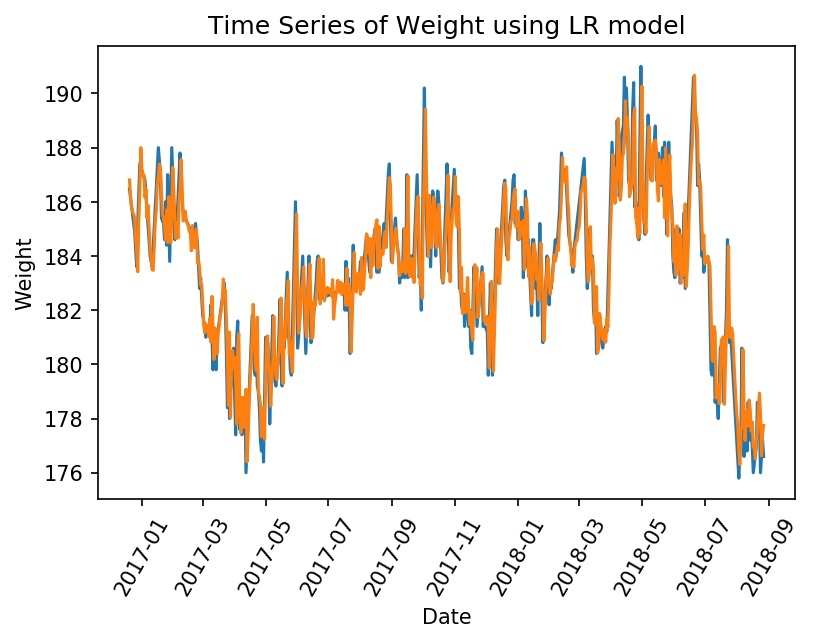

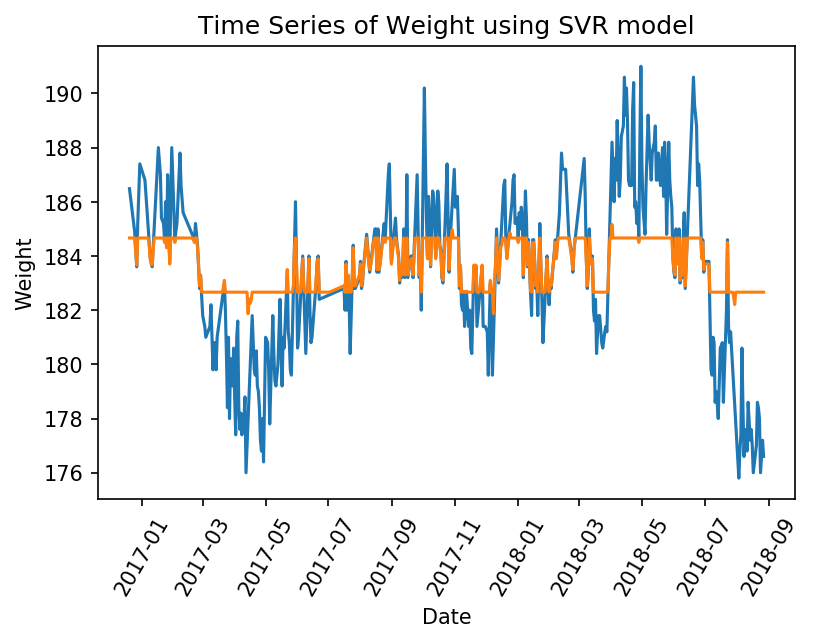

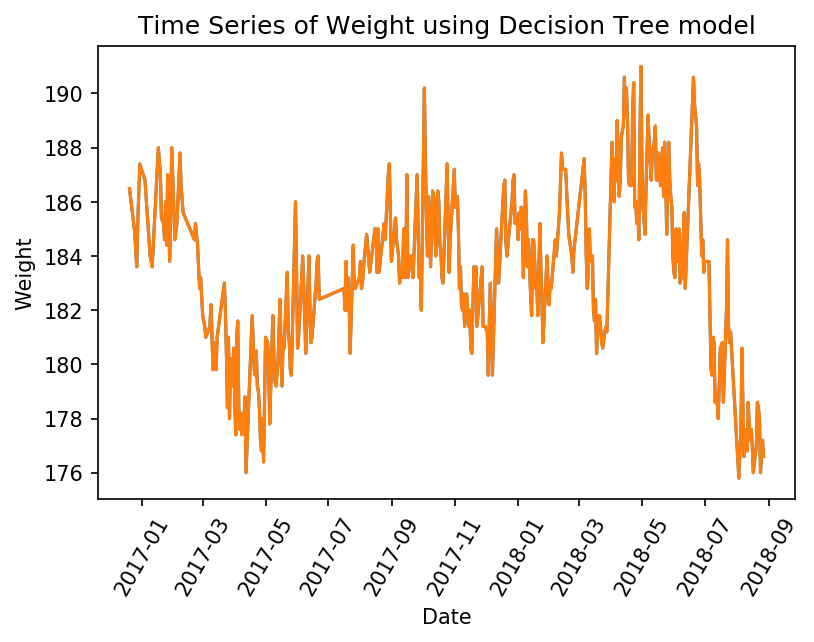

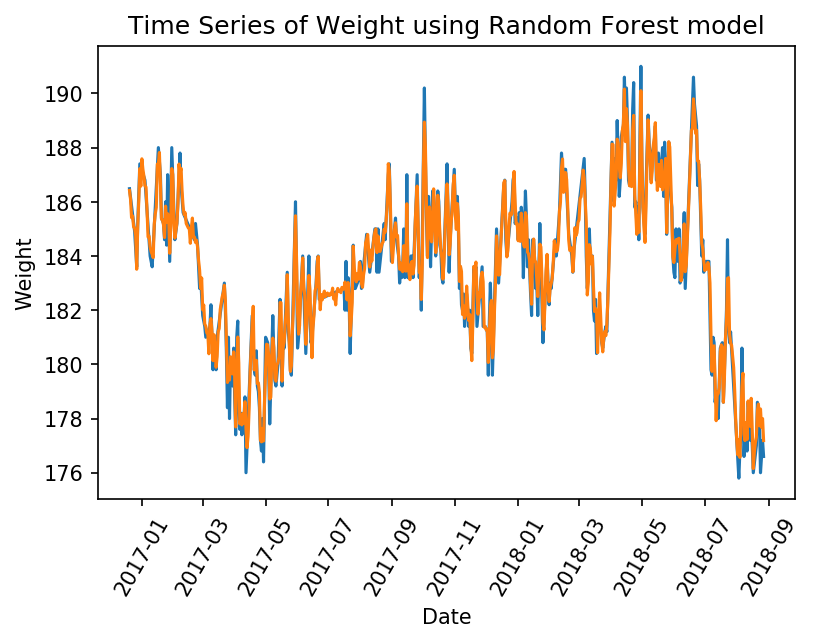

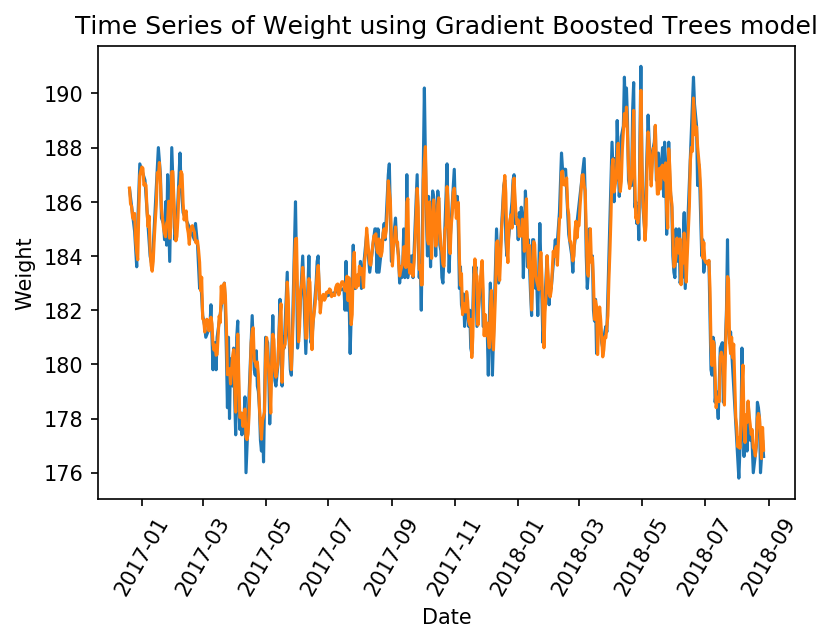

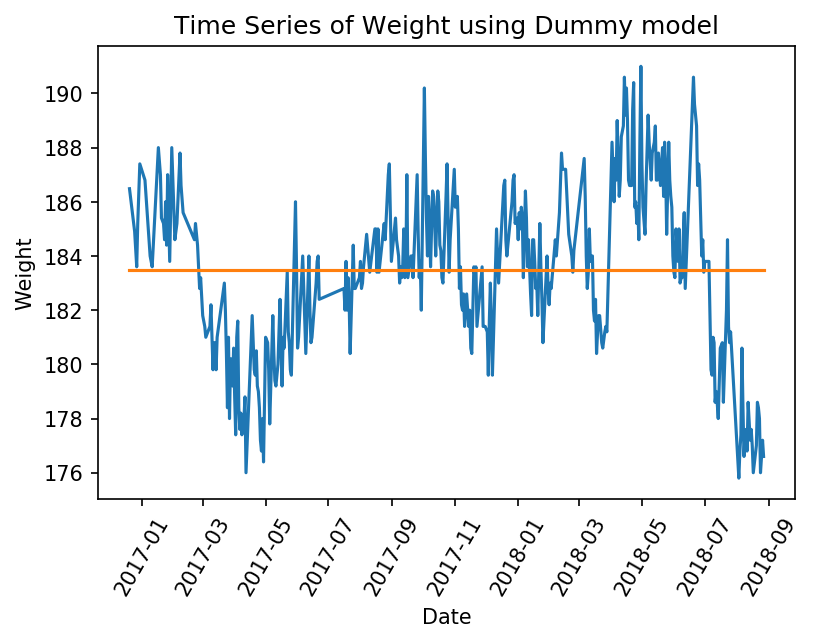

In [74]:
models = [ar1, svc1, dt1, rf1, gbt1, dc1]
names = ['LR','SVR', 'Decision Tree', 'Random Forest', 'Gradient Boosted Trees', 'Dummy']

for i in range(len(models)):
    plt.figure(dpi=150)
    plt.plot(X.index, y)
    plt.plot(X.index, models[i].predict(X))
    plt.xticks(rotation=60)
    plt.xlabel('Date')
    plt.ylabel('Weight')
    plt.title(f'Time Series of Weight using {names[i]} model');

In [75]:
for i in range(2,31):
    df[f'lag{i}'] = df['Weight'].shift(i)

X = df.iloc[:,:]
X.head()

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,...,lag21,lag22,lag23,lag24,lag25,lag26,lag27,lag28,lag29,lag30
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-16,7949.359551,6.100120,1856.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,16.202247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-17,5514.820225,4.235007,1855.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,23.292135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-18,4782.921348,3.679812,1855.0,5.146067,15.494382,702.179775,1440.0,85.123596,12.157303,24.078652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-19,6743.966292,5.175902,1855.0,4.640449,13.977528,869.786517,1440.0,127.393258,9.348315,23.853933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-20,7318.181818,5.671428,1854.0,5.215909,15.704545,911.261364,1440.0,148.397727,8.636364,17.397727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
X.columns

Index(['Steps', 'Distance', 'Calories_Burned', 'Floors', 'Elevation',
       'Activity_Calories', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories', 'Fat (g)',
       'Saturated Fat', 'Polyunsaturated Fat', 'Monounsaturated Fat',
       'Trans Fat', 'Cholesterol', 'Sodium (mg)', 'Potassium',
       'Carbohydrates (g)', 'Fiber', 'Sugar', 'Protein (g)', 'Vitamin A',
       'Vitamin C', 'Calcium', 'Iron', 'Calories_Breakfast',
       'Fat_(g)_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Fat_(g)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Fat_(g)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner', 'Weight', 'Net_Calories',
       'Day_of_week', 'Calories_MA30', 'Weight_MA30', 'Median_Weight',
       'Std_Weight', 'residual', 'z', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5',
  

In [77]:
X = df.loc[:, ['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Cholesterol', 'Sodium (mg)', 'Potassium',
       'Fiber', 'Vitamin A', 'Vitamin C', 'Calcium', 'Iron', 'Calories_Breakfast',
       'Fat_(g)_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Fat_(g)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Fat_(g)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner','lag1', 'lag2', 'lag3', 'lag4', 'lag5',
       'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12', 'lag13',
       'lag14', 'lag15', 'lag16', 'lag17', 'lag18', 'lag19', 'lag20', 'lag21',
       'lag22', 'lag23', 'lag24', 'lag25', 'lag26', 'lag27', 'lag28', 'lag29',
       'lag30']]
X = X.dropna()
y = df.loc[X.index, 'Weight']

In [78]:
ar30 = LinearRegression()
ar30.fit(X, y)
ar30_score = ar30.score(X,y)

svc30 = SVR()
svc30.fit(X, y)
svc30_score = svc30.score(X,y)

dt30 = DecisionTreeRegressor()
dt30.fit(X, y)
dt30_score = dt30.score(X,y)

rf30 = RandomForestRegressor()
rf30.fit(X, y)
rf30_score = rf30.score(X,y)

gbt30 = GradientBoostingRegressor()
gbt30.fit(X, y)
gbt30_score = gbt30.score(X,y)

dc30 = DummyRegressor()
dc30.fit(X, y)
dc30_score = dc30.score(X,y)

print('Scores using 1 lag')
print(f'Linear Regression Score: {ar30_score}')
print(f'Support Vector Regressor Score: {svc30_score}')
print(f'Decision Tree Score: {dt30_score}')
print(f'Random Forest Regressor Score: {rf30_score}')
print(f'Gradient Boosted Trees Regressor Score: {gbt30_score}')
print(f'Dummy Classifier Score: {dc30_score}')

Scores using 1 lag
Linear Regression Score: 0.8765755604285458
Support Vector Regressor Score: 0.4282740698995217
Decision Tree Score: 1.0
Random Forest Regressor Score: 0.9698758354892175
Gradient Boosted Trees Regressor Score: 0.9591683639763304
Dummy Classifier Score: 0.0


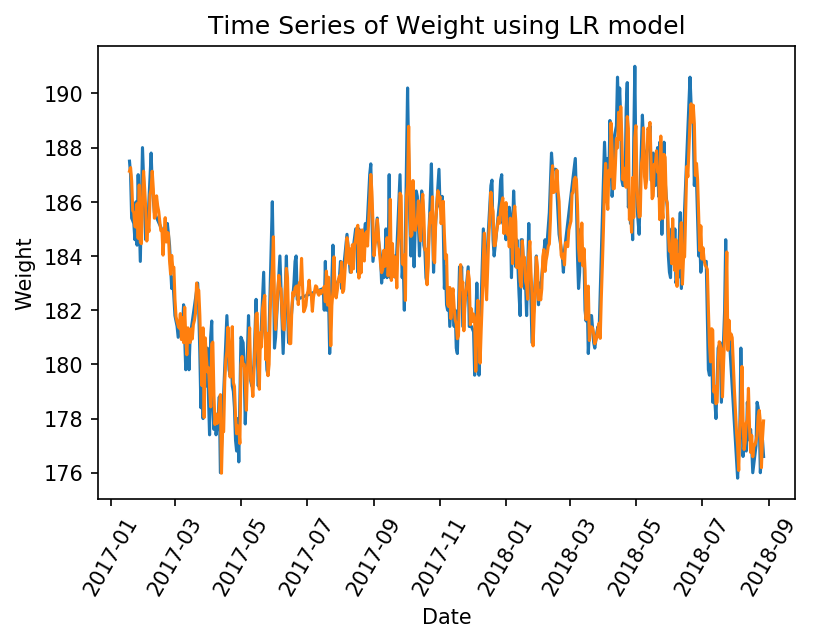

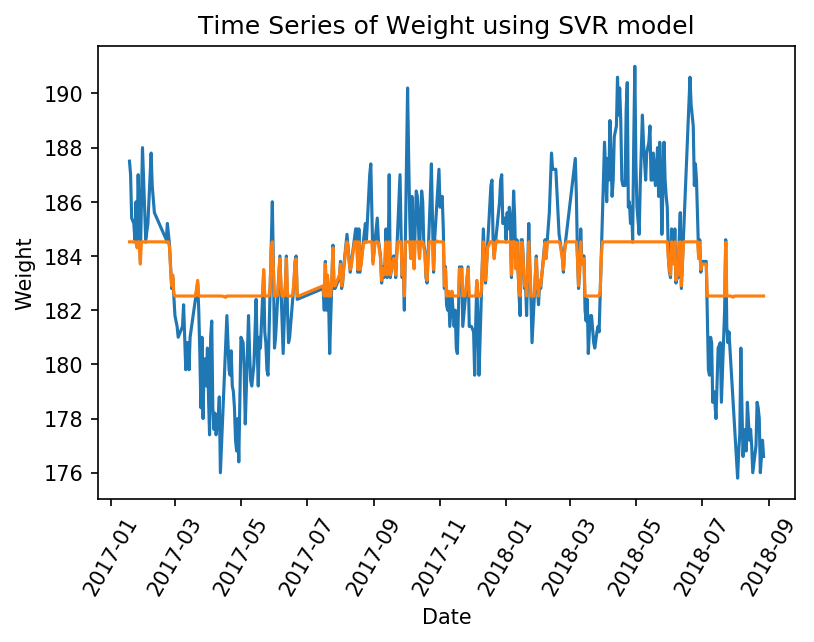

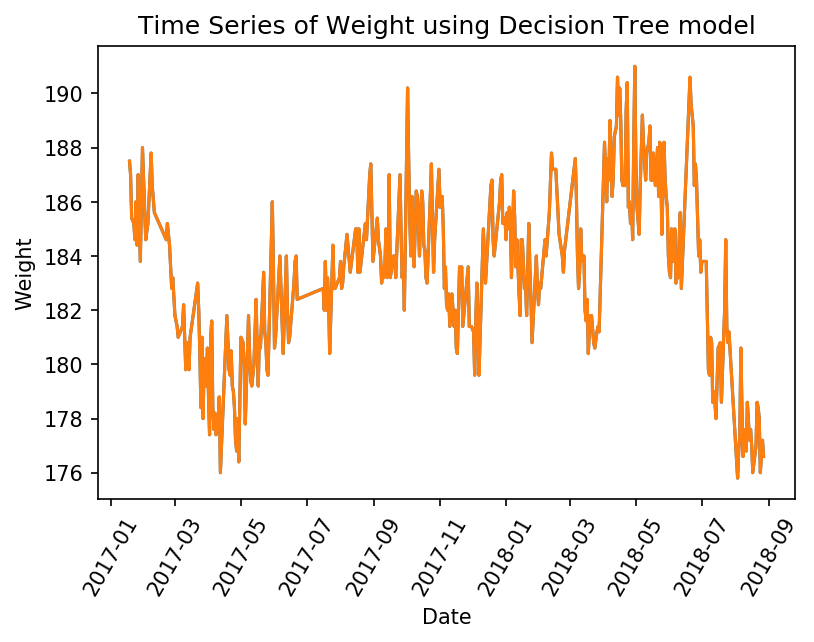

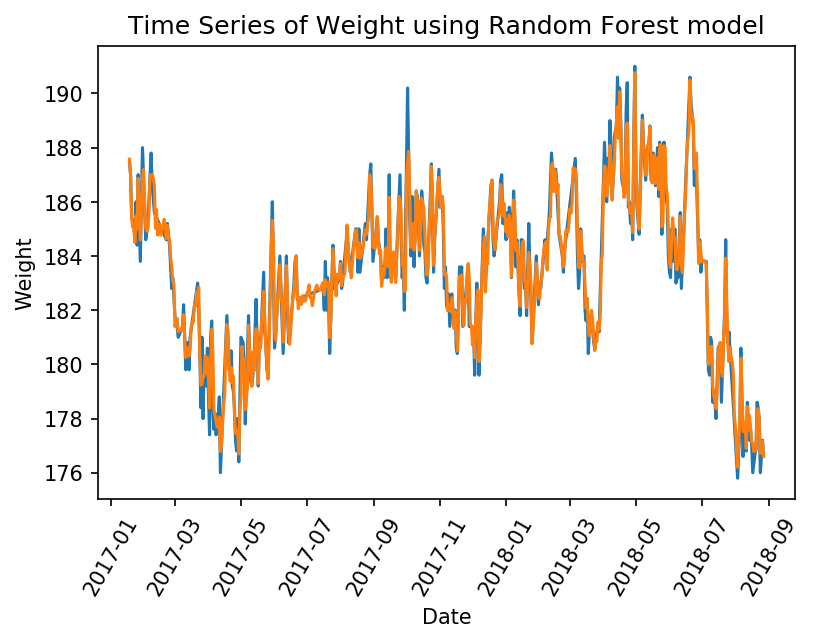

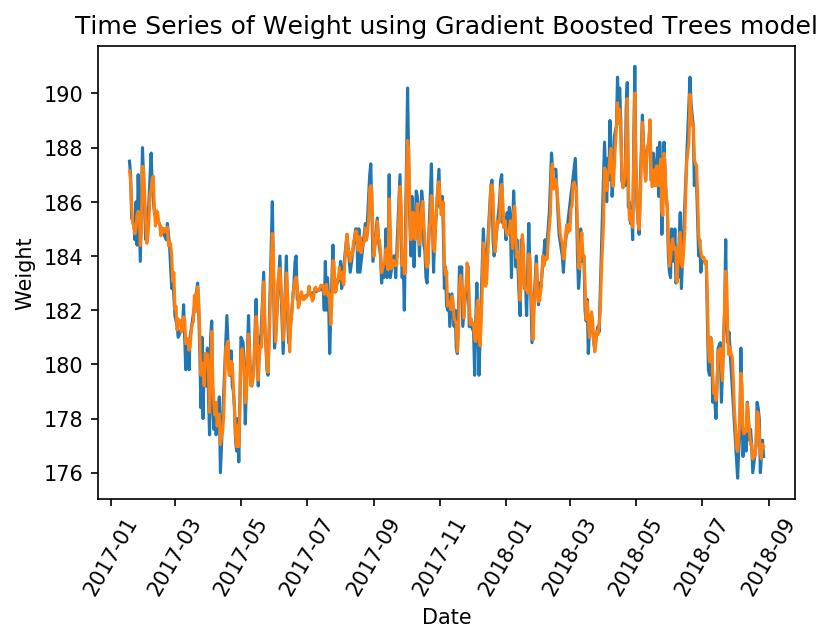

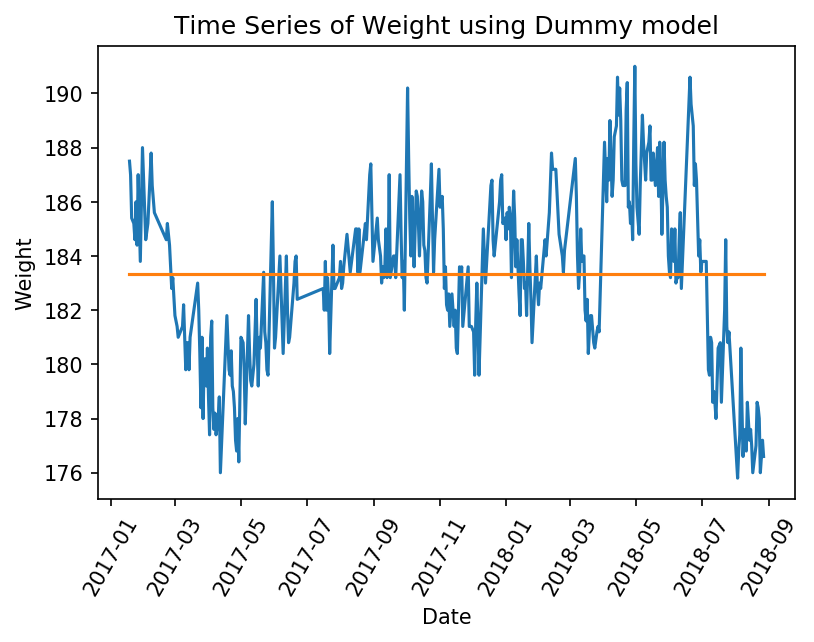

In [79]:
models = [ar30, svc30, dt30, rf30, gbt30, dc30]
names = ['LR','SVR', 'Decision Tree', 'Random Forest', 'Gradient Boosted Trees', 'Dummy']

for i in range(len(models)):
    plt.figure(dpi=150)
    plt.plot(X.index, y)
    plt.plot(X.index, models[i].predict(X))
    plt.xticks(rotation=60)
    plt.xlabel('Date')
    plt.ylabel('Weight')
    plt.title(f'Time Series of Weight using {names[i]} model');

In [80]:
rf30.feature_importances_

array([8.05094956e-03, 1.39639854e-03, 1.19376255e-03, 1.83351466e-03,
       2.09681343e-03, 1.91430197e-03, 2.78636826e-03, 2.76793094e-03,
       1.71479240e-03, 3.07453792e-03, 2.14491124e-03, 1.76667242e-03,
       1.27401437e-03, 8.51625478e-04, 1.59154119e-03, 3.37023185e-03,
       3.84461541e-03, 2.29626877e-03, 1.23380971e-03, 1.78432185e-03,
       1.20100146e-03, 5.83824663e-03, 2.70474332e-03, 3.24216587e-03,
       3.48280296e-03, 2.29761850e-03, 2.41293716e-03, 8.96757713e-04,
       8.55294057e-01, 6.71512166e-03, 5.94646355e-03, 4.31965413e-03,
       2.26373641e-03, 4.72869379e-03, 4.95900430e-03, 1.22349432e-03,
       1.30446324e-03, 1.07402091e-03, 2.53127087e-03, 1.36621501e-03,
       4.92974127e-03, 1.79361756e-03, 9.96844975e-04, 1.86388415e-03,
       8.98975388e-04, 1.82936694e-03, 2.05116048e-03, 4.94026421e-03,
       1.98905302e-03, 1.52523812e-03, 5.46100178e-04, 1.22783183e-03,
       1.89830627e-03, 2.15233011e-03, 5.23455428e-03, 1.98281238e-03,
      

In [81]:
importances = list(zip(rf30.feature_importances_, X.columns))
importances.sort(reverse=True)
importances

[(0.8552940571341686, 'lag1'),
 (0.008050949561619239, 'Steps'),
 (0.0067151216615731575, 'lag2'),
 (0.005946463551429091, 'lag3'),
 (0.00583824663272588, 'Sugar_Lunch'),
 (0.0052345542822576745, 'lag27'),
 (0.004959004295989983, 'lag7'),
 (0.004940264212201866, 'lag20'),
 (0.004929741266934989, 'lag13'),
 (0.004728693789033493, 'lag6'),
 (0.004319654126972646, 'lag4'),
 (0.003844615406053684, 'Sugar_Breakfast'),
 (0.0034828029601698166, 'Fat_(g)_Dinner'),
 (0.0033702318486193822, 'Carbohydrates_(g)_Breakfast'),
 (0.0032421658680120043, 'Calories_Dinner'),
 (0.003074537921477388, 'Vitamin A'),
 (0.002786368264366942, 'Sodium (mg)'),
 (0.002767930942021869, 'Potassium'),
 (0.0027047433173490875, 'Protein_(g)_Lunch'),
 (0.002531270868025835, 'lag11'),
 (0.002412937158180224, 'Sugar_Dinner'),
 (0.0023325494519328294, 'lag30'),
 (0.002297618499534129, 'Carbohydrates_(g)_Dinner'),
 (0.0022962687668439765, 'Protein_(g)_Breakfast'),
 (0.002263736405040971, 'lag5'),
 (0.002152330107113974, 'la

In [82]:
importances = list(zip(dt30.feature_importances_, X.columns))
importances.sort(reverse=True)
importances

[(0.851814138973833, 'lag1'),
 (0.009764103040187596, 'lag6'),
 (0.00822580207731078, 'lag4'),
 (0.008132692362669388, 'lag2'),
 (0.007390325755381799, 'lag5'),
 (0.007151077018122477, 'Sugar_Breakfast'),
 (0.0066837419199070516, 'Fiber'),
 (0.0065439813450530685, 'lag20'),
 (0.005985719234000991, 'Steps'),
 (0.005938247963035663, 'Carbohydrates_(g)_Dinner'),
 (0.005739075070226053, 'Iron'),
 (0.005695195996427433, 'lag19'),
 (0.00537608970432924, 'Minutes_Fairly_Active'),
 (0.004429036673144275, 'Calcium'),
 (0.003982742102643242, 'lag27'),
 (0.003377167966393511, 'Protein_(g)_Lunch'),
 (0.0031155028894735725, 'lag26'),
 (0.002713453418374601, 'Vitamin C'),
 (0.002698993501464495, 'Calories_Dinner'),
 (0.002516253681060248, 'lag3'),
 (0.0024455894743311483, 'lag11'),
 (0.0023716070160614638, 'Cholesterol'),
 (0.0022640326317309163, 'lag7'),
 (0.0021989399081989236, 'lag16'),
 (0.002094931236482523, 'Fat_(g)_Lunch'),
 (0.00192790928376358, 'lag24'),
 (0.0017695862599585404, 'lag14'),
 

In [83]:
importances = list(zip(ar30.coef_, X.columns))
importances.sort(reverse=True)
importances

[(0.8587262477287827, 'lag1'),
 (0.16888573779815771, 'lag27'),
 (0.16667566528913302, 'lag3'),
 (0.13279046899440045, 'lag6'),
 (0.10739963225690868, 'lag21'),
 (0.04484820374925865, 'lag13'),
 (0.02998928111340707, 'lag7'),
 (0.025781786732217687, 'lag14'),
 (0.023843473858596975, 'lag11'),
 (0.023185301585013068, 'lag19'),
 (0.021372351024517847, 'lag16'),
 (0.01814146475413192, 'lag17'),
 (0.016193772014577487, 'Sugar_Lunch'),
 (0.01145480863302782, 'lag5'),
 (0.007720023723561548, 'lag12'),
 (0.0064545025165871055, 'Fiber'),
 (0.006002517084183983, 'Fat_(g)_Lunch'),
 (0.0032421002199101243, 'Minutes_Fairly_Active'),
 (0.003088620252546095, 'Fat_(g)_Dinner'),
 (0.002812511649213291, 'Carbohydrates_(g)_Dinner'),
 (0.002342323850504798, 'Calories_Breakfast'),
 (0.00201491316567579, 'Protein_(g)_Lunch'),
 (0.0016403000160076565, 'lag30'),
 (0.0008656056134646261, 'Vitamin A'),
 (0.0006978442869450801, 'Protein_(g)_Dinner'),
 (0.0006228544620068303, 'Minutes_Very_Active'),
 (0.00036289

In [84]:
df.columns

Index(['Steps', 'Distance', 'Calories_Burned', 'Floors', 'Elevation',
       'Activity_Calories', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories', 'Fat (g)',
       'Saturated Fat', 'Polyunsaturated Fat', 'Monounsaturated Fat',
       'Trans Fat', 'Cholesterol', 'Sodium (mg)', 'Potassium',
       'Carbohydrates (g)', 'Fiber', 'Sugar', 'Protein (g)', 'Vitamin A',
       'Vitamin C', 'Calcium', 'Iron', 'Calories_Breakfast',
       'Fat_(g)_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Fat_(g)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Fat_(g)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner', 'Weight', 'Net_Calories',
       'Day_of_week', 'Calories_MA30', 'Weight_MA30', 'Median_Weight',
       'Std_Weight', 'residual', 'z', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5',
  

In [154]:
X = df.loc[:, ['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
               'Calories', 'Fat (g)','Saturated Fat', 'Polyunsaturated Fat',
               'Monounsaturated Fat','Trans Fat', 'Cholesterol',
               'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Sodium (mg)',
               'Carbohydrates (g)', 'Sugar', 'Protein (g)',
               'lag1', 'lag2', 'lag3', 'lag4', 'lag5',
               'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12', 'lag13',
               'lag14', 'lag15', 'lag16', 'lag17', 'lag18', 'lag19', 'lag20', 'lag21',
               'lag22', 'lag23', 'lag24', 'lag25', 'lag26', 'lag27', 'lag28', 'lag29',
               'lag30']]
X = X.dropna()
y = df.loc[X.index, 'Weight']

In [155]:
ar30_general = LinearRegression()
ar30_general.fit(X, y)
ar30_general_score = ar30_general.score(X,y)

svc30_general = SVR()
svc30_general.fit(X, y)
svc30_general_score = svc30_general.score(X,y)

dt30_general = DecisionTreeRegressor()
dt30_general.fit(X, y)
dt30_general_score = dt30_general.score(X,y)

rf30_general = RandomForestRegressor()
rf30_general.fit(X, y)
rf30_general_score = rf30_general.score(X,y)

gbt30_general = GradientBoostingRegressor()
gbt30_general.fit(X, y)
gbt30_general_score = gbt30_general.score(X,y)

dc30_general = DummyRegressor()
dc30_general.fit(X, y)
dc30_general_score = dc30_general.score(X,y)

print('Scores using 1 lag')
print(f'Linear Regression Score: {ar30_general_score}')
print(f'Support Vector Regressor Score: {svc30_general_score}')
print(f'Decision Tree Score: {dt30_general_score}')
print(f'Random Forest Regressor Score: {rf30_general_score}')
print(f'Gradient Boosted Trees Regressor Score: {gbt30_general_score}')
print(f'Dummy Classifier Score: {dc30_general_score}')

Scores using 1 lag
Linear Regression Score: 0.8735020866209104
Support Vector Regressor Score: 0.4281528300096213
Decision Tree Score: 1.0
Random Forest Regressor Score: 0.974922467339282
Gradient Boosted Trees Regressor Score: 0.9573648534469102
Dummy Classifier Score: 0.0


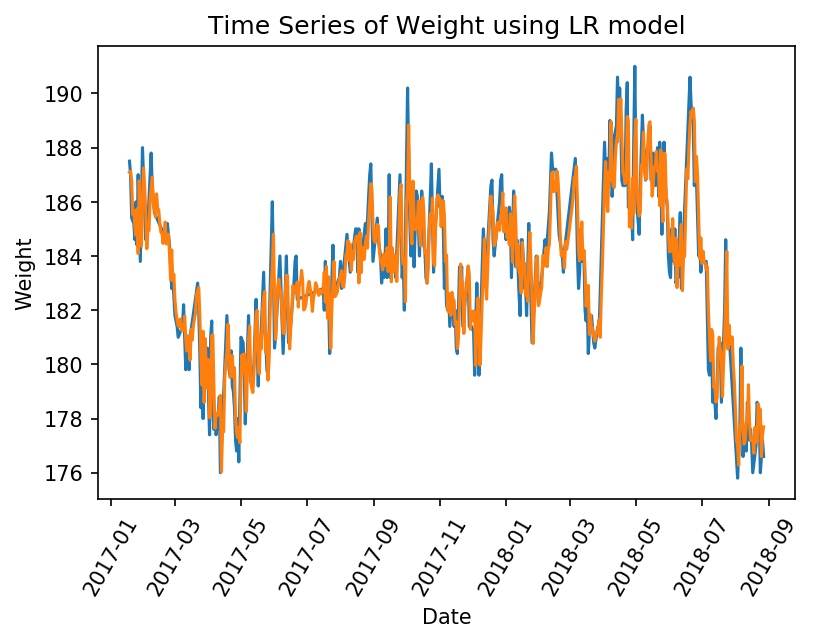

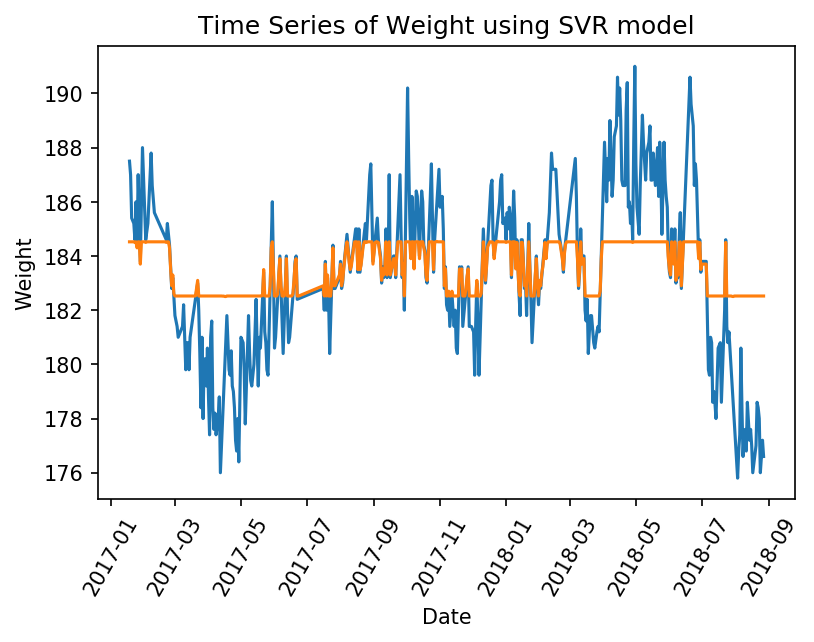

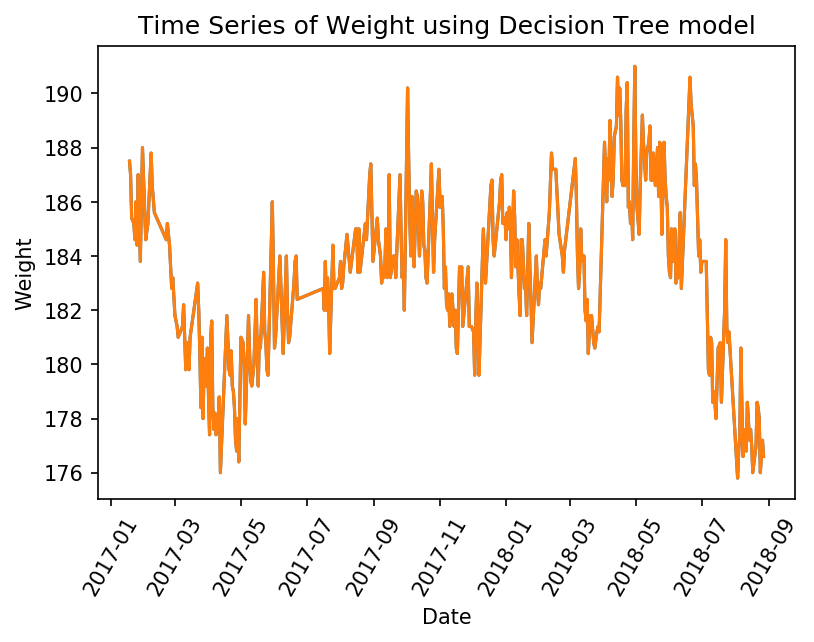

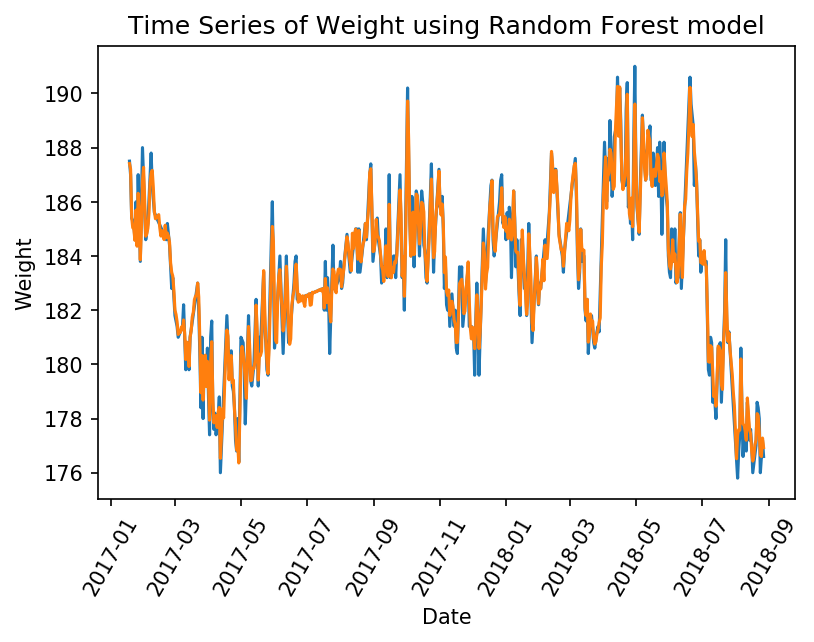

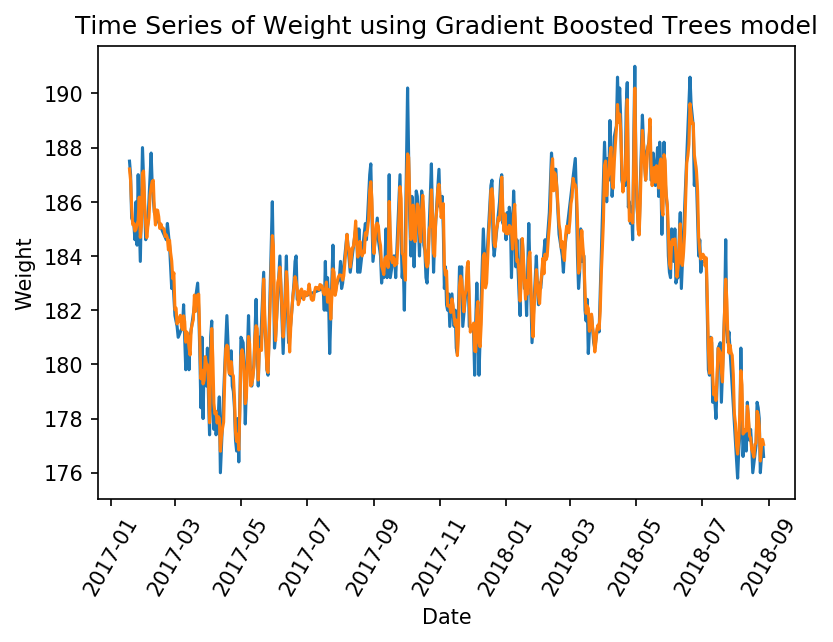

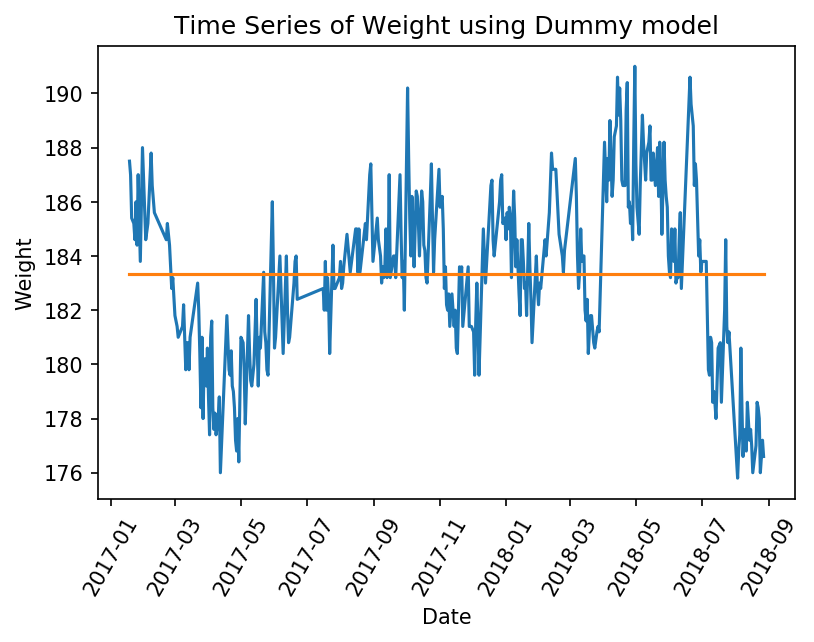

In [156]:
models = [ar30_general, svc30_general, dt30_general, rf30_general, gbt30_general, dc30_general]
names = ['LR','SVR', 'Decision Tree', 'Random Forest', 'Gradient Boosted Trees', 'Dummy']

for i in range(len(models)):
    plt.figure(dpi=150)
    plt.plot(X.index, y)
    plt.plot(X.index, models[i].predict(X))
    plt.xticks(rotation=60)
    plt.xlabel('Date')
    plt.ylabel('Weight')
    plt.title(f'Time Series of Weight using {names[i]} model');

In [157]:
importances = list(zip(rf30_general.feature_importances_, X.columns))
importances.sort(reverse=True)
importances

[(0.8509347933614546, 'lag1'),
 (0.008692622477708065, 'lag6'),
 (0.006702134280320719, 'lag3'),
 (0.006687069029195686, 'Steps'),
 (0.006467110920601956, 'lag19'),
 (0.006381187346879815, 'lag20'),
 (0.006126064431045685, 'Trans Fat'),
 (0.0049189262933123515, 'lag13'),
 (0.004754811582470949, 'Polyunsaturated Fat'),
 (0.00466569003970066, 'lag14'),
 (0.004435578207867741, 'lag7'),
 (0.00407881219438058, 'lag2'),
 (0.003954792983483964, 'Minutes_Very_Active'),
 (0.0038018820143083747, 'lag27'),
 (0.0036869883217446947, 'lag15'),
 (0.003592349583307351, 'Saturated Fat'),
 (0.0033962341822676794, 'lag26'),
 (0.0033587993449023883, 'lag16'),
 (0.00334396538935391, 'Minutes_Lightly_Active'),
 (0.003298644219311711, 'Minutes_Sedentary'),
 (0.0032848346019072943, 'Cholesterol'),
 (0.002882924224610117, 'lag5'),
 (0.002814995101252346, 'Minutes_Fairly_Active'),
 (0.0026766080979195726, 'lag22'),
 (0.0026667905920924042, 'lag11'),
 (0.002626744976499226, 'lag17'),
 (0.0025727325040209546, 'la

In [158]:
importances = list(zip(dt30_general.feature_importances_, X.columns))
importances.sort(reverse=True)
importances

[(0.8513363274881164, 'lag1'),
 (0.009355825552985576, 'lag6'),
 (0.009353498366953568, 'lag3'),
 (0.008786840451508866, 'Carbohydrates (g)'),
 (0.00874757797522863, 'lag2'),
 (0.008440979174329469, 'Steps'),
 (0.007716848950361438, 'lag20'),
 (0.006310693341319933, 'Minutes_Fairly_Active'),
 (0.006209218296846553, 'lag5'),
 (0.006130227271441983, 'lag19'),
 (0.006075366026884826, 'Saturated Fat'),
 (0.005762792046887329, 'Trans Fat'),
 (0.005595553426959731, 'Calories'),
 (0.005556003503769812, 'Cholesterol'),
 (0.005291216088048662, 'lag27'),
 (0.004751681924469642, 'lag13'),
 (0.004657639827167771, 'Protein (g)'),
 (0.003926543537467341, 'Minutes_Lightly_Active'),
 (0.003838896644660803, 'lag4'),
 (0.003044233252299996, 'Sugar'),
 (0.002875179235529668, 'lag18'),
 (0.0020342933757588545, 'Minutes_Sedentary'),
 (0.0018110009291667259, 'Monounsaturated Fat'),
 (0.001795984409631232, 'Sodium (mg)'),
 (0.001759583415906281, 'lag9'),
 (0.0017441660207224814, 'Polyunsaturated Fat'),
 (0.0

In [159]:
importances = list(zip(ar30_general.coef_, X.columns))
importances.sort(reverse=True)
importances

[(0.860137624623421, 'lag1'),
 (0.17531659869462293, 'lag3'),
 (0.17492001500967855, 'lag27'),
 (0.10043634011642237, 'lag6'),
 (0.08951777055238638, 'lag21'),
 (0.05489626192834726, 'lag13'),
 (0.05065562281855695, 'Trans Fat'),
 (0.04863731234216515, 'lag5'),
 (0.034742598009700795, 'lag7'),
 (0.0312624225018445, 'lag11'),
 (0.022858629774259672, 'lag19'),
 (0.01718672319862818, 'lag14'),
 (0.016935566164188065, 'lag16'),
 (0.012803714478919051, 'lag17'),
 (0.006153612072641074, 'Fat (g)'),
 (0.003802420859670643, 'lag25'),
 (0.002175847062286494, 'Minutes_Fairly_Active'),
 (0.0016248050805319776, 'Polyunsaturated Fat'),
 (0.0012309509873922719, 'Minutes_Very_Active'),
 (0.0001350403250489636, 'Cholesterol'),
 (7.197619059590348e-05, 'Sugar'),
 (6.222526868320781e-05, 'Minutes_Sedentary'),
 (2.5362816220018334e-05, 'Sodium (mg)'),
 (1.6679273271361342e-06, 'Calories'),
 (-8.35330147299728e-06, 'Steps'),
 (-0.00029792312752577056, 'Carbohydrates (g)'),
 (-0.00031866443934042377, 'Minu